___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Natural Language Processing Project

Welcome to the NLP Project for this section of the course. In this NLP project you will be attempting to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews. This will be a simpler procedure than the lecture, since we will utilize the pipeline methods for more complex tasks.

We will use the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. 

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

Let's get started! Just follow the directions below!

## Imports

In [19]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data

In [2]:
# Read the yelp.csv file and set it as a dataframe called yelp
yelp = pd.read_csv('yelp.csv')

** Check the head, info , and describe methods on yelp.**

In [3]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [5]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [10]:
# Create a new column called "text length" which is the number of words in the text column

yelp['text_length'] =  yelp['text'].apply(len)

In [12]:
yelp.head(2)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345


# EDA



## Visualization:

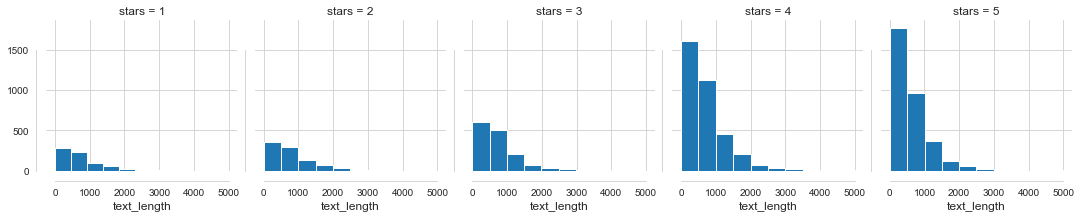

In [45]:
# text_length according to rating:
plt.rcParams["axes.labelsize"] = 12
sns.set_style("whitegrid")
g = sns.FacetGrid(yelp, col='stars')
g.map(plt.hist, 'text_length')
sns.despine(offset=10, trim=True);

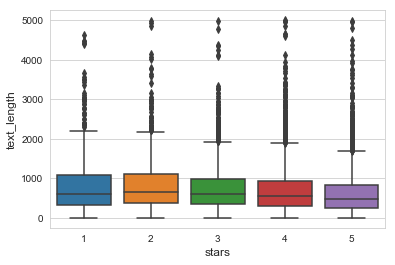

In [46]:
# boxplot of text length for each star category
sns.boxplot(data=yelp, x='stars', y='text_length');

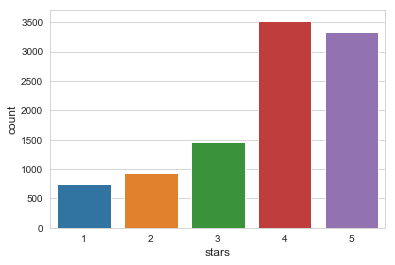

In [50]:
# countplot of the number of occurrences for each type of star rating
sns.countplot(x=yelp['stars']);

** Use groupby to get the mean values of the numerical columns, you should be able to create this dataframe with the operation:**

In [52]:
stars_grpby = yelp.groupby('stars').mean()
stars_grpby

,cool,useful,funny,text_length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


**Use the corr() method on that groupby dataframe to produce this dataframe:**

In [53]:
stars_grpby.corr()

,cool,useful,funny,text_length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text_length,-0.857664,0.699881,0.843461,1.000000


**Then use seaborn to create a heatmap based off that .corr() dataframe:**

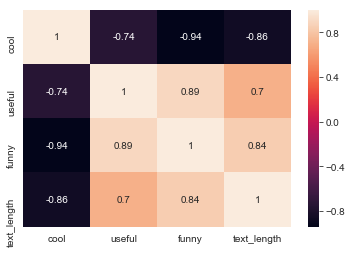

In [55]:
sns.heatmap(stars_grpby.corr(), annot=True);

## NLP Classification Task

Create a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.

In [63]:
# Creat new dataframe, yelp_class that has only 1 or 5 star reviews:

yelp_class = yelp[(yelp['stars']==1) | (yelp['stars']==5)]
yelp_class['stars'].unique()

array([5, 1], dtype=int64)

** Create two objects X and y. X will be the 'text' column of yelp_class and y will be the 'stars' column of yelp_class. (Your features and target/labels)**

In [231]:
# prepare feature and target:

X = yelp_class['text']   # feature
y = yelp_class['stars']  # target

**Import CountVectorizer and create a CountVectorizer object.**

In [67]:
from sklearn.feature_extraction.text import CountVectorizer

** Use the fit_transform method on the CountVectorizer object and pass in X (the 'text' column). Save this result by overwriting X.**

In [232]:
X = CountVectorizer().fit_transform(X)

## Train Test Split


In [71]:
from sklearn.model_selection import train_test_split

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111)

## Training a Model


In [234]:
# import Naive Bayes, and instantiate a model

from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

**Now fit nb using the training data.**

In [235]:
# fit model

nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Predictions and Evaluations


**Use the predict method off of nb to predict labels from X_test.**

In [236]:
# Predict labels
predictions = nb.predict(X_test)

** Create a confusion matrix and classification report using these predictions and y_test **

In [79]:
# import confusion_matrix and classification_report

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [237]:
cm = confusion_matrix(y_test, predictions)
print('Accuracy= ',round((cm[0,0]+cm[1,1]) / (cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])*100, 2),'%');

Accuracy=  90.83 %


+ From a total of 155 reviews with 1start, 105 were correctly predicted by the model, and 50 were wrongly predicted as a 5star. <br>
+ From a total of 663 5star reviews, 638 were correctly predicted, but 25 were wrongly predicted as 1star.<br>
+ Model **Accuracy = 90.8%** (638+105/638+105+50+25)

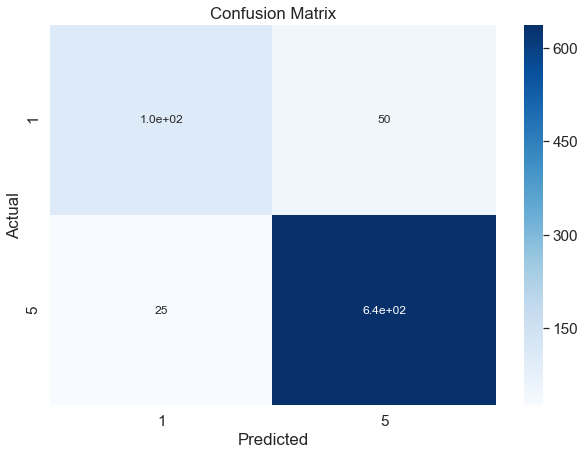

In [97]:
# Plot confusion matrix

df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7));
plt.title('Confusion Matrix');
sns.set(font_scale=1.4)#for label size
cm_plot = sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 12})

In [238]:
print(classification_report(y_test,predictions));

              precision    recall  f1-score   support

           1       0.81      0.68      0.74       155
           5       0.93      0.96      0.94       663

   micro avg       0.91      0.91      0.91       818
   macro avg       0.87      0.82      0.84       818
weighted avg       0.90      0.91      0.91       818



**Let's see what happens if we try to include TF-IDF to this process using a pipeline.**

# Using Text Processing

** Import TfidfTransformer from sklearn. **

In [84]:
from sklearn.feature_extraction.text import TfidfTransformer

** Import Pipeline from sklearn. **

In [86]:
from sklearn.pipeline import Pipeline

** Now create a pipeline with the following steps:CountVectorizer(), TfidfTransformer(),MultinomialNB()**

In [119]:
pipeline = Pipeline([
    ('bow', CountVectorizer()), # string to token integer counts
    ('tfidf', TfidfTransformer()), # integer counts to weighted TF_IDF scores
    ('naive_bayes', MultinomialNB()), # train on TF_IDF vectors with naive Bayes model
])

## Using the Pipeline


### Train Test Split

**Redo the train test split on the yelp_class object.**

In [174]:
# Redo train, test split since X was previously over-written:

X = yelp_class['text']
y = yelp_class['stars']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=111)

In [175]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

### Predictions and Evaluation


In [122]:
predict = pipeline.predict(X_test)

In [123]:
print(confusion_matrix(y_test, predict))

[[  0 202]
 [  0 820]]


In [126]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       202
           5       0.80      1.00      0.89       820

   micro avg       0.80      0.80      0.80      1022
   macro avg       0.40      0.50      0.45      1022
weighted avg       0.64      0.80      0.71      1022



C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


+ Using TF-IDF seems to have made the model worse.

## Trials:


### 1) Pipeline without TF-IDF:

In [209]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),
#    ('tfidf', TfidfTransformer()),
    ('naive_bayes', MultinomialNB()),
])

In [210]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)), ('naive_bayes', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [211]:
predict_tfidf = pipeline.predict(X_test)

In [212]:
cm = confusion_matrix(y_test, predict_tfidf)
print('Accuracy= ',round((cm[0,0]+cm[1,1]) / (cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])*100, 2),'%')

Accuracy=  91.59 %


In [213]:
print(classification_report(y_test, predict_tfidf))

              precision    recall  f1-score   support

           1       0.89      0.66      0.76       202
           5       0.92      0.98      0.95       820

   micro avg       0.92      0.92      0.92      1022
   macro avg       0.90      0.82      0.85      1022
weighted avg       0.91      0.92      0.91      1022



### 2) Using Random Forest classifier:

In [181]:
from sklearn.ensemble import RandomForestClassifier

In [214]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),
    ('random_forestC', RandomForestClassifier()),
])

In [215]:
pipeline.fit(X_train,y_train)

C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [217]:
predict_rf = pipeline.predict(X_test)

In [218]:
cm = confusion_matrix(y_test, predict_rf)
print('Accuracy= ',round((cm[0,0]+cm[1,1]) / (cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])*100, 2),'%')

Accuracy=  85.13 %


In [219]:
print(classification_report(y_test, predict_rf))

              precision    recall  f1-score   support

           1       0.84      0.31      0.45       202
           5       0.85      0.99      0.91       820

   micro avg       0.85      0.85      0.85      1022
   macro avg       0.85      0.65      0.68      1022
weighted avg       0.85      0.85      0.82      1022



### 3) Using Logistic Regression:

In [186]:
from sklearn.linear_model import LogisticRegression

In [220]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),
    ('logregC', LogisticRegression()),
])

In [221]:
pipeline.fit(X_train,y_train)

C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [222]:
predict_logreg = pipeline.predict(X_test)

In [223]:
cm = confusion_matrix(y_test, predict_logreg)
print('Accuracy= ',round((cm[0,0]+cm[1,1]) / (cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])*100, 2),'%')

Accuracy=  92.95 %


In [224]:
print(classification_report(y_test, predict_logreg))

              precision    recall  f1-score   support

           1       0.92      0.70      0.80       202
           5       0.93      0.99      0.96       820

   micro avg       0.93      0.93      0.93      1022
   macro avg       0.93      0.84      0.88      1022
weighted avg       0.93      0.93      0.93      1022



### Summary and Conclusions:
In this project:
+ TF-IDF seems to yield worse results.
+ Three classifiers were tried: Naive Bayes, Random Forest and Logistic Regression.
+ Logistic Regression gave the best classification results, with an accuracy of 92.95%.<br> Naive Bayes was the 2nd best model at 91.59% accuracy, and Random Forest 3rd best at 85.13%.